### 1.Setup

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#tf.logging.set_verbosity(tf.logging.ERROR) 

print("tf version: {}".format(tf.__version__))
tf.set_random_seed(1)
np.random.seed(1)

/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/fangjil/anaconda3/envs/jubo_1/lib/pyt

tf version: 1.14.0


### 2. Get the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)
data.test.cls = np.argmax(data.test.labels, axis=1) 

img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 1
num_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### 3. Build the neural network 

#### 3.1 setup the neural network

In [3]:
input_x = tf.placeholder(tf.float32, [None, img_size_flat]) 
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.argmax(y_true, dimension=1)

with tf.variable_scope("DNN_1_model"):
    h1_a = tf.layers.dense(inputs=input_x, units=100, activation=tf.nn.relu, name='h1_a')
    h2_a = tf.layers.dense(inputs=h1_a, units=200, activation=tf.nn.relu, name='h2_a')
    h3_a = tf.layers.dense(inputs=h2_a, units=200, activation=tf.nn.relu, name='h3_a') 
    h4_a = tf.layers.dense(inputs=h3_a, units=200, activation=tf.nn.relu, name='h4_a')
    h5_a = tf.layers.dense(inputs=h4_a, units=20, activation=tf.nn.relu, name='h5_a') 
    h6_a = tf.layers.dense(inputs=h5_a, units=200, activation=tf.nn.relu, name='h6_a') 
    h7_a = tf.layers.dense(inputs=h6_a, units=100, activation=tf.nn.relu, name='h7_a') 
    logits_a = tf.layers.dense(inputs=h7_a, units= num_classes, name='output_a')
    y_pred_a = tf.nn.softmax(logits=logits_a)
    y_pred_cls_a = tf.argmax(y_pred_a, dimension=1)

    

    
    
trainable_variable_a = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, "DNN_1_model")
cross_entropy_a = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits_a)
loss_a = tf.reduce_mean(cross_entropy_a)
optimizer_a = tf.train.AdamOptimizer(learning_rate=1e-4)
train_op_a = optimizer_a.minimize(loss_a, var_list= trainable_variable_a)
correct_prediction_a = tf.equal(y_pred_cls_a, y_true_cls)
accuracy_a = tf.reduce_mean(tf.cast(correct_prediction_a, tf.float32))





Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### 3.2 play with the parameters

In [4]:
def get_total_para_num(tf_variables):
    total_parameters = 0
    for variable in tf_variables:
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        total_parameters += variable_parameters
    return total_parameters

print(get_total_para_num(trainable_variable_a))


208430


#### 3.3 train the network

In [5]:
print(np.arange(0,5,1))




[0 1 2 3 4]


In [8]:
alpha_list = np.arange(0,1+0.1,0.1)

list_loss_total = []
list_loss_total_t = []
list_acc_total = []
list_acc_total_t = []

with tf.Session() as sess:
    for alpha_1 in alpha_list: 

        train_batch_size = int(np.around(64*(1-alpha_1)+1024*alpha_1))
        print(train_batch_size)

        sess.run(tf.global_variables_initializer()) 

        list_loss_a = []
    
        list_loss_a_t = []

        list_acc_a = []

    
        list_acc_a_t = []
    
    
    
    
        for iteration in range(int(np.around(55000*100/train_batch_size))):
            x_batch, y_true_batch = data.train.next_batch(int(train_batch_size))
            feed_dict_train = {input_x: x_batch, y_true: y_true_batch}
            sess.run(train_op_a, feed_dict = feed_dict_train)
        #sess.run(train_op_a, feed_dict = feed_dict_train)
        
            if iteration % 100 == 0:
                feed_dict_test = {input_x: data.test.images, y_true: data.test.labels}
                y_true_cls_batch = np.argmax(y_true_batch, axis=1) 
                l_a,a_a = sess.run([loss_a,  accuracy_a], feed_dict = feed_dict_train)
                l_a_t, a_a_t = sess.run([loss_a, accuracy_a], feed_dict = feed_dict_test)
            
                list_loss_a.append(l_a)

                list_acc_a.append(a_a)
            
                list_loss_a_t.append(l_a_t)

                list_acc_a_t.append(a_a_t)
                
        list_loss_total.append(min(list_loss_a))
        list_loss_total_t.append(min(list_loss_a_t))
        list_acc_total.append(max(list_acc_a))
        list_acc_total_t.append(max(list_acc_a_t))




64
160
256
352
448
544
640
736
832
928
1024


In [14]:
print(list_acc_total_t)
print(list_acc_total)

[0.9801, 0.9783, 0.9755, 0.9727, 0.9738, 0.9735, 0.9711, 0.9716, 0.9725, 0.9729, 0.9725]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/home/fangjil/anaconda3/envs/jubo_1/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


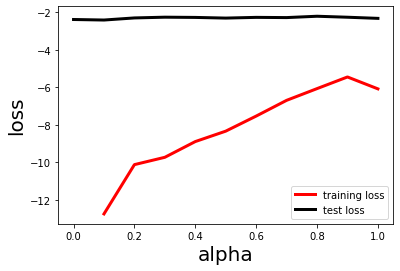

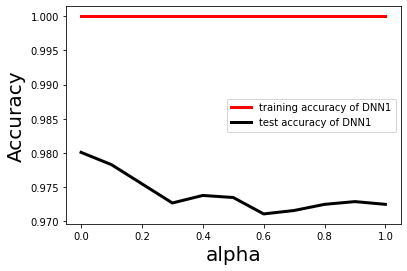

In [18]:
#epoches = np.array(list_iter)/55000*64

plt.plot(alpha_list,np.log(list_loss_total), 'r-', lw=3, label = "training loss")
plt.plot(alpha_list,np.log(list_loss_total_t), 'k-', lw=3, label = "test loss")
plt.xlabel("alpha", fontsize = 20)
plt.ylabel("loss", fontsize = 20)
plt.legend()
plt.show()

# plt.plot(list_iter,list_acc_a, 'r-', lw=3, label = "training accuracy of DNN1")
# #plt.plot(list_iter,list_acc_b, 'k-', lw=3, label = "training accuracy of DNN2")
# plt.xlabel("# of iteration", fontsize = 20)
# plt.ylabel("Accuracy", fontsize = 20)
# plt.legend()
# plt.show()

plt.plot(alpha_list,list_acc_total, 'r-', lw=3, label = "training accuracy of DNN1")
plt.plot(alpha_list,list_acc_total_t, 'k-', lw=3, label = "test accuracy of DNN1")
plt.xlabel("alpha", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.legend()
plt.show()